In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation and validation libraries
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import precision_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.preprocessing import StandardScaler

# Classifier libraries
from sklearn.neighbors import KNeighborsClassifier

In [31]:
df = pd.read_csv('winequality-red.csv')

In [ ]:
df['quality'] = np.where(df['quality'] >= 7, 1, 0)

### Preprocessing

In [32]:
X_train, X_test = train_test_split(df, test_size=0.20, random_state=42)
print("Train size: ", X_train.shape)
print("Test size: ", X_test.shape)

Train size:  (1279, 12)
Test size:  (320, 12)


In [33]:
def oversample_dataset(data):
    X = data.drop(columns={'quality'})
    y = data['quality']
    
    sm = SMOTE(random_state=42)
    
    X_sm, y_sm = sm.fit_resample(X, y)
    sm_df = pd.concat([X_sm, y_sm], axis=1)
    
    return sm_df

X_train_sm = oversample_dataset(X_train)

In [34]:
y_train = X_train_sm['quality']
y_test = X_test['quality']
X_train = X_train_sm.drop(columns={'quality'})
X_test = X_test.drop(columns={'quality'})

print("Train size: ", X_train.shape)
print("Test size: ", X_test.shape)

Train size:  (2218, 11)
Test size:  (320, 11)


In [35]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

### Model

<AxesSubplot:title={'center':'n Neighbors vs Precision'}, xlabel='n Neighbors', ylabel='Precision'>

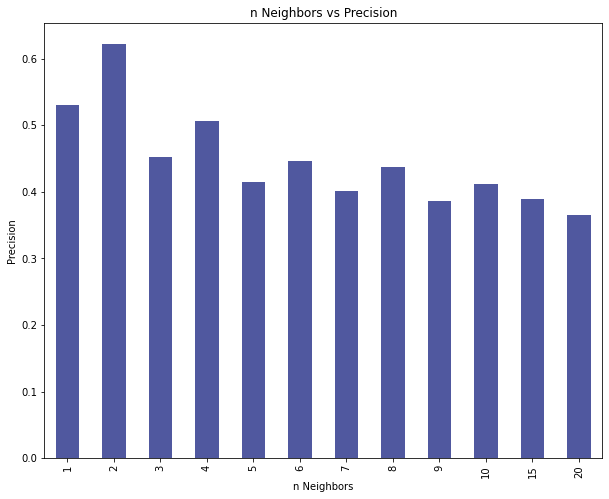

In [42]:
scores = []
n_neighbors = []

n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

for i in n:    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    score = precision_score(y_test, y_pred)
    scores.append(score)
    n_neighbors.append([i, score])
    
plt.figure(figsize=(10,8))
plt.title("n Neighbors vs Precision")
plt.xlabel("n Neighbors")
plt.ylabel("Precision")
pd.Series(scores, n).plot(kind='bar', color='#50589F')

In [44]:
id_n = pd.DataFrame(n_neighbors, columns=['n', 'score'])['score'].idxmax()
n_neighbor = pd.DataFrame(n_neighbors, columns=['n', 'score'])['n'][id_n]
print("n:", n_neighbor)

n: 2


In [47]:
def knn_features(X_train, X_test, y_train, y_test):

    n_neighbors = []

    n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

    for i in n:    
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        score = precision_score(y_test, y_pred)
        n_neighbors.append([i, score])

        
    id_n = pd.DataFrame(n_neighbors, columns=['n', 'score'])['score'].idxmax()
    n_neighbor = pd.DataFrame(n_neighbors, columns=['n', 'score'])['n'][id_n]
    
    response = {
        "n": n_neighbor
    }
        
    return response

In [48]:
knn_features(X_train_scaled, X_test_scaled, y_train, y_test)

{'n': 2}